# 크롤링

## 웹문서 (html)의 구조
head : 통괄하는 information을 가지고 있다.

body : 실질적인 information을 가지고 있다. 

아래 구조: 1.전형적인 방법 / 2.속성 명시 / 3.내용 부재시 닫는 태그 없음

<여는태그>내용</닫는태그>                   
<여는태그 속성명="속성값">내용</닫는태그>   
<여는태그 속성명="속성값" />                

html: 전체 html 문서를 감싸는 태그입니다. 하나만 존재해야 하고 html 바깥에 DOCTYPE을 제외한 다른 태그가 있으면 안 됩니다.  
head: html 문서에 대한 정보를 나타내는 부분입니다. 하나만 존재해야하고, html 바로 아래에 있어야합니다.  
body: html 문서에서 실제적으로 보여지는 부분을 나타냅니다. 하나만 존재해야 하고, html 바로 아래, head 다음에 위치해야 합니다.  
title: head 안에 들어가는 태그로 제목표시줄의 내용을 나타냅니다.  
meta: 문서에 대한 설명을 표시합니다. 사람에게는 보이지 않고, 브라우저만 읽을 수 있습니다. 속성으로 charset="utf-8"이라고 한 것은 브라우저에게 한글인코딩을 UTF-8로 설정하라고 알린 겁니다. 이 부분이 있어야 한글이 깨지지 않습니다.  
h1: body 안에서 제목을 표시하는 태그입니다. 중요도에 따라 h1부터 h2, h3, ..., h6까지 있습니다.  
div: 구역을 표시하는 태그입니다. 눈에 보이지는 않지만 p와 img 태그를 하나의 구역으로 묶었습니다.  
p: 문단을 표시하는 태그입니다. 여기 안에 글의 내용을 넣으면 됩니다.  
img: 이미지를 표시하는 태그입니다. 아까 src라는 속성이 있었는데 src는 이미지 파일의 경로(위치)를 지정하는 속성입니다.  
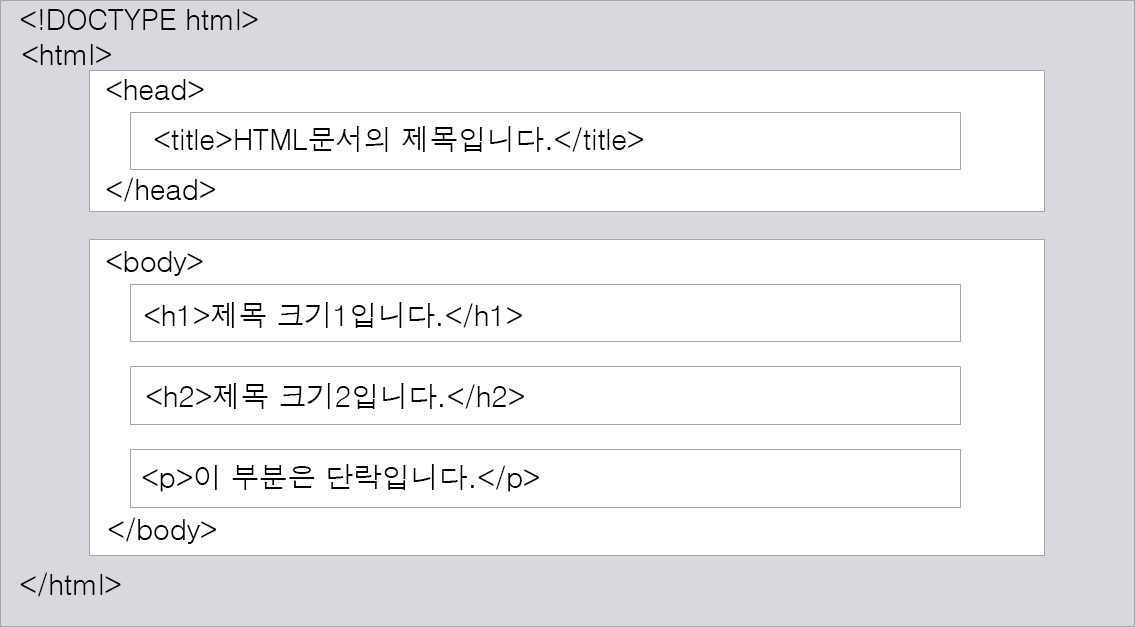

-UTF-8 : 한글처리가 가능하게 된다.
<br>
-밑에서 urlopen을 쓰기 위해서 import하는 것이다. import urllib을 해도 되지만 메모리가 너무 크기에 urrlib 파일 안에 urlopen만 쓰는 것이다.
<br>
-밑에서 BeautifulSoup를 쓰기 위해서 import
<br>
-사용할 툴들을 미리 메모리로 끌어온다고 생각하자

In [4]:
# _*_ coding: UTF-8 _*_
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

-urlopen함수를 통해서 원하는 internet resource를 가져오자
<br>
-그 정보를 html 변수에 집어넣자.
<br>
-html의 정보는 아직 HTML code인 것 같다. 그러므로 HTML code에서 우리가 볼 수 있는 데이터를 뽑는 작업이 html.parser

In [16]:
html = urlopen("http://www.naver.com")
html

## 웹문서 전체를 가져오기

"html.parser":
<br>
HTML parsing is basically: taking in HTML code and extracting relevant information like the title of the page, paragraphs in the page, headings in the page, links, bold text etc.
<br>
HTML parsing, they really mean HTML deserialization - the process of taking a character stream and turning it into a object model

BeautifulSoup:
<br>
Python library for pulling data out of HTML and XML files

In [17]:
bsObject = BeautifulSoup(html, "html.parser")
bsObject

<html>
<head>
<!--<?xml version="1.0" encoding="UTF-8"?><WISPAccessGatewayParam xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://www.acmewisp.com/WISPAccessGatewayParam.xsd">	<Redirect>		<AccessProcedure>1.0</AccessProcedure>		<AccessLocation>QookNShow</AccessLocation>		<LocationName>QookNShow</LocationName>		<LoginURL>https://first.wifi.olleh.com/webauth/wispr/login.php?ip=121.134.221.246&mac=f8633f1c5d5e</LoginURL>		<MessageType>100</MessageType>		<ResponseCode>0</ResponseCode>	</Redirect></WISPAccessGatewayParam>-->
<script>
	 location.href = "http://first.wifi.olleh.com/webauth/redirection.php?ip=121.134.221.246&mac=f8633f1c5d5e&url=http://www.naver.com&ssid=KT_starbucks&ap_mac=00300d88f72f&apmodel=MW-6900AP";
	</script>
</head>
</html>

### 웹문서 첫 줄 빼고 가져오기
<br>
태그 안에 또 태그가 나올 수 있다. 태그하고 바로 태그가 sequentially 나와도 되지만 꼭 그렇게 안 하고 hierarchical 해도 된다. 

In [18]:
bsObject.html

<html>
<head>
<!--<?xml version="1.0" encoding="UTF-8"?><WISPAccessGatewayParam xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://www.acmewisp.com/WISPAccessGatewayParam.xsd">	<Redirect>		<AccessProcedure>1.0</AccessProcedure>		<AccessLocation>QookNShow</AccessLocation>		<LocationName>QookNShow</LocationName>		<LoginURL>https://first.wifi.olleh.com/webauth/wispr/login.php?ip=121.134.221.246&mac=f8633f1c5d5e</LoginURL>		<MessageType>100</MessageType>		<ResponseCode>0</ResponseCode>	</Redirect></WISPAccessGatewayParam>-->
<script>
	 location.href = "http://first.wifi.olleh.com/webauth/redirection.php?ip=121.134.221.246&mac=f8633f1c5d5e&url=http://www.naver.com&ssid=KT_starbucks&ap_mac=00300d88f72f&apmodel=MW-6900AP";
	</script>
</head>
</html>

## head 가져오기

In [19]:
bsObject.head

<head>
<!--<?xml version="1.0" encoding="UTF-8"?><WISPAccessGatewayParam xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://www.acmewisp.com/WISPAccessGatewayParam.xsd">	<Redirect>		<AccessProcedure>1.0</AccessProcedure>		<AccessLocation>QookNShow</AccessLocation>		<LocationName>QookNShow</LocationName>		<LoginURL>https://first.wifi.olleh.com/webauth/wispr/login.php?ip=121.134.221.246&mac=f8633f1c5d5e</LoginURL>		<MessageType>100</MessageType>		<ResponseCode>0</ResponseCode>	</Redirect></WISPAccessGatewayParam>-->
<script>
	 location.href = "http://first.wifi.olleh.com/webauth/redirection.php?ip=121.134.221.246&mac=f8633f1c5d5e&url=http://www.naver.com&ssid=KT_starbucks&ap_mac=00300d88f72f&apmodel=MW-6900AP";
	</script>
</head>

## title 가져오기

title: head 안에 들어가는 태그로 제목표시줄의 내용을 나타냅니다.

In [20]:
bsObject.head.title

In [22]:
<title>'NAVER'</title>

SyntaxError: invalid syntax (<ipython-input-22-afa8433b2151>, line 1)

전형적인 웹문서 구조의 
<br>
<여는태그>내용</닫는태그>

get_text():
<br>
꺽쇠에 포함되지 않은 내용을 가져와라!

In [24]:
bsObject.head.title.get_text()  # bsObject.head.title.text.strip()

'NAVER'

## meta 데이터 가져오기

meta content="NAVER" name="apple-mobile-web-app-title"
<br>
여기서의 닫는 태그는 /meta /meta /meta /meta **/meta** 이것이다.
그리고 위에 코드 이후에 닫는 태그가 안 나오는 코드 4개를 더 찾을 수 있다.
<br>
그 네 개의 닫는 태그가 저 위에 /meta이다. 

**find all**
<br>
head에서 내부적으로 들어있는 태그에서 meta라고 불리우는 태그를 모두 찾아라!
<br>
태그로 묶여있는 것을 다 주기 때문에 중복되는 것이 많다. (펼쳐보기)
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
이것들을 다 준 다음에
<meta content="NAVER" name="apple-mobile-web-app-title">
여기서부터 끝까지 다 준 다음에
그 다음에 enclosed 된 meta를 또 끝까지 다시 준다. 
<meta content="index,nofollow" name="robots">

so, 중복이 된다. 


In [23]:
bsObject.head.find_all('meta')

[]

## meta 데이터의 모든 content 가져오기

In [3]:
bsObject.head.find_all('meta')

NameError: name 'bsObject' is not defined

meta의 property를 가져오는 것이다.
<br>
meta가 들어있는 모든 것을 받았으니 그것을 for loop에 집어넣는다.
<br> 
그러니까 meta가 첫번째부터 차례대로 loop에 들어가서 “content value”이 나올 것이다. **get**이라는 함수를 써서!!
<br>
<br>
meta charset="utf-8"/     %여기서 content가 아니므로 안 나와 -> None
<br>
meta content="origin" name="Referrer"/                      %-> origin 

In [26]:
for meta in bsObject.head.find_all('meta'):
    print(meta.get('content'))

None
origin
text/javascript
text/css
IE=edge
width=1100
NAVER
index,nofollow
네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요
네이버
https://www.naver.com/
https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png
네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요
summary

https://www.naver.com/
https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png
네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요


## meta 데이터 중 원하는 tag 가져오기

함수 find 를 통해서 property를 자세히 지정함으로써 원하는 것을 가져온다.
<br>
find all과 차이점! find all은 다 가져온다. 
<br>
property가 name이고 property name이 description인 것을 가져와라! 


In [29]:
bsObject.head.find("meta", {"name":"description"})

<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:description">
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://pm.pstatic.net/css/main_v190219.css" rel="stylesheet" type="text/css"/>
<link href="https://pm.pstatic.net/css/webfont_v170623.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/sstat

위에서 갖고 온 것의 content를 갖고 와라.

In [10]:
bsObject.head.find("meta", {"name":"description"}).get('content')

'네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요'

property value가 네이버인 것의 property를 가져와라.

In [11]:
bsObject.head.find("meta", {"content":"네이버"}).get('property')

'og:title'

## 모든 링크의 텍스트와 주소 가져오기

bsObject (전체) %bsObject.html: 전체에서 html만 
<br>
태그가 a인 것을 다 찾아라. 다 찾아서 loop를 돌려라.
<br>
**get_text**: 꺽쇠에 있는 것을 다 빼고 내용만 받아와
<br>
**get** : 특정 property의 property값을 받아.

In [52]:
for link in bsObject.find_all('a'):
    print(link.get_text(), link.get('href'))

스킵 네비게이션 사용하기 #
메인 메뉴로 바로가기 #lnb
하위 메뉴로 바로가기 javascript:nextLeftCategoryFocus();
본문으로 바로가기 #content
 http://www.naver.com
 /
 http://nstore.naver.com/ebook/recommendList.nhn
 https://audioclip.naver.com/
 #
 javascript:goNaverSearch('snbSearchForm');
 #
분야별 찾기 #
책 홈 /index.nhn
베스트셀러 /bestsell/bestseller_list.nhn
지서재 /bookshelf/index.nhn
출판사공간 http://publisher.naver.com
본문시작 #
YES24 /bestsell/bestseller_list.nhn?cp=yes24
인터넷 교보문고 /bestsell/bestseller_list.nhn?cp=kyobo
알라딘 /bestsell/bestseller_list.nhn?cp=aladdin
인터파크 도서 /bestsell/bestseller_list.nhn?cp=bookpark
반디앤루니스 /bestsell/bestseller_list.nhn?cp=bandi
영풍문고 /bestsell/bestseller_list.nhn?cp=ypbooks
도서11번가 /bestsell/bestseller_list.nhn?cp=morning365
종합 javaScript:best_move('yes24','total','1')
소설 javaScript:best_move('yes24','001001044','2')
시/에세이 javaScript:best_move('yes24','001001045','3')
비즈니스와 경제 javaScript:best_move('yes24','001001025','4')
자기관리 javaScript:best_move('yes24','001001026','5')
어린이 javaScript:best_move('yes24','0010

## 예제: 네이버 베스트셀러 주간 순위에 있는 책의 정보를 가져오기
첫페이지에 있는 25권의 책목록에서 링크를 추출하여 각 추출된 링크로 접속하여 책이름, 저자, 가격 정보등을 출력

In [45]:
html = urlopen('https://book.naver.com/bestsell/bestseller_list.nhn')
bsObject = BeautifulSoup(html, "html.parser")

In [46]:
bsObject

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
종합, YES24, 베스트셀러 : 네이버 책</title>
<meta content="article" property="og:type"/>
<meta content="네이버 책: 베스트셀러" property="og:title"/>
<meta content="http://book.naver.com/bestsell/bestseller_list.nhn" property="og:url"/>
<meta content="https://ssl.pstatic.net/static/m/book/icons/book_og_270x270.png" property="og:image"/>
<meta content="책으로 만나는 새로운 세상" property="og:description"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버 책" property="og:article:author"/>
<meta content="https://book.naver.com" property="og:article:author:url"/>
<link href="http://www.naver.com/favicon.ico?book" rel="shortcut icon" type="image/x-icon"/>
<script type="text/javascript">
var __bLogin = false;
var __bAdult = false;
</script>
<link href="/css/release/base_20190318064110.css" rel="stylesheet" type="text/css"/>
<scri

loop가 25번 돌아가
<br>
dt에서 id가 booktitle이면
<br>
dt tag에서 **select** 함수를 사용해서 a라는 태그를 찾아라. 그것의 첫번째 꺼 text만 찾아오라. 
<br>
dt에서 다음에 나오는 태그(next_sibling)
근데 dt다음에 enter 치고 dt가 시작되는 것이기 때문에 sibiling을 두 번 뛴다고 생각해서 next_sibiling을 두 번 써준다. 그리고 태그 a에서 (그중에서도 첫번째 a 태그)에서 **get_text**

In [54]:
for n in range(0,25):
    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    title = dt.select('a')[0].get_text()
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
    print(n+1, title, author, publisher)

1 설민석의 한국사 대모험 9  설민석 아이휴먼
2 공부머리 독서법  최승필 책구루
3 철학은 어떻게 삶의 무기가 되는가  야마구치 슈 다산초당
4 고요할수록 밝아지는 것들  혜민 수오서재
5 에어프라이어 만능 레시피북  강지현 엔트리
6 선재국어 나침판 실전 모의고사 vol. 1  이선재 에스티유니타스
7 아주 작은 습관의 힘  제임스 클리어 비즈니스북스
8 해커스 토익 기출 보카  David Cho 해커스어학연구소
9 말센스  셀레스트 헤들리 스몰빅라이프
10 우린 너무 몰랐다  김용옥 통나무
11 나는 나로 살기로 했다  김수현 마음의숲
12 인어가 잠든 집  히가시노 게이고 재인
13 댄 애리얼리 부의 감각  댄 애리얼리 청림출판
14 ETS 토익 정기시험 기출문제집 1000 READING  ETS YBM
15 이동기 영어 실전동형 모의고사 1  이동기 에스티유니타스
16 ETS 토익 정기시험 기출문제집 1000 LISTENING  ETS YBM
17 꽃을 보듯 너를 본다  나태주 지혜
18 스즈키 바이올린 교본 1  세광음악 편집부 세광음악출판사
19 아이를 위한 하루 한 줄 인문학  김종원 청림라이프
20 시나공 정보처리기사 실기  한기준 길벗
21 수미네 반찬  김수미 성안당
22 이동기 영어 기적의 특강  이동기 에스티유니타스
23 던전에서 만남을 추구하면 안 되는 걸까 14  오모리 후지노 소미미디어
24 해커스 토익 스타트 리딩(RC) (신토익 Edition)  David Cho 해커스어학연구소
25 만복이네 떡집  김리리 비룡소


파일 이름을 crawling~이라 하고 그걸 f라 칭하자. csv 파일을 만들자.
<br>
writerow : 한 줄씩 쓰는 것이다. 제목처럼 헤더를 쓰는 것이다.

In [55]:
# Create a file to write to, add headers row
with open('crawling.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['rank', 'title', 'author', 'publisher'])
        
    for n in range(0,25):
        dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
        title = dt.select('a')[0].get_text()
        author = dt.next_sibling.next_sibling.select('a')[0].get_text()
        publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
        writer.writerow([n+1, title, author, publisher])

excel – import – csv file import 
<br>
file origin – Unicode (UTF-8)  , delimiter : comma 

# Debug 

for n in range(0,25):
    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    title = dt.select('a')[0].get_text()
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
    print(n+1, title, author, publisher)
<br>
이제 무엇이 잘못되었는지 알고 싶을때는 debug를 해보자. 
그래서 range(0,1): 으로 해보자. 즉, 한 바퀴만 루프를 돌려보는 것이다. 
<br>
for n in range(0,1):
    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    print(dt)
    title = dt.select('a')[0].get_text()
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
    # print(n+1, title, author, publisher)    % 안 나오게끔 #를 표시 
<br>
<br>
for n in range(0,1):
    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    print(dt.select(‘a’)[0])   % print(dt.select(‘a’)[0].get_text())
    title = dt.select('a')[0].get_text()   
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
    # print(n+1, title, author, publisher)
<br>
하나하나 다 맞게 나오는지 확인을 해야 한다. 특히 % print get text 이것은 딱 책 제목만 나오는 것이 만다는 것을 확인하는 것이다. 
<br>
<br>
for n in range(0,25):
    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    title = dt.select('a')[0].get_text()

    print(dt.next_sibling)   
    
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
   #print(n+1, title, author, publisher)
<br>
next_sibling이 내가 원하는 부분을 주는지 확인하자. 근데 이렇게 하면 아무 결과값도 나오지 않는다. 왜냐하면 enter를 주기 때문이다. 그렇기에 print(dt.next_sibiling.next_sibiling)을 해보자
<br>
print(dt.next_sibling.next_sibling.select('a'))
<br>
print(type(dt.next_sibling.next_sibling.select('a')))  
<br>
-> class <lib> : library (대괄호)안에 두개의 a 태그가 있다는 것을 확인 할 수 있다.
 <br>
print(dt.next_sibling.next_sibling.select('a')[0].get_text()) -> 저자명만 딱 나올 것이다. 
<br>
<br>
for n in range(0,25):
    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    title = dt.select('a')[0].get_text()
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()
    <br>
    print(dt.next_sibling.next_sibling.get_text())
    <br>
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
    #/.print(n+1, title, author, publisher)
<br>
최승필 저 / 
<br>
책구루
<br>
<br>
>여기서 책구루라는 출판사명만 갖고 오고 싶다! 
<br>
 그러면 split 함수를 사용해서 다 하나하나 구분시키고 원하는 출판사명(마지막에 오는 것일 것 같다는 생각으로)만 뽑아오자. 
  <br>
print(dt.next_sibling.next_sibling.get_text().split()[-1]) %3이 아니라 -1을 넣자. 그래서 마지막에 access하는 것이 유용하다.
